In [0]:
import networkx as nx
import random as rn
import numpy as np

In [0]:
def qvoter_model(G,p,q):
  '''One step of algorithm'''
  #pick a random spinson
  n = rn.choice(list(G.nodes))
  #independent with probability p
  if p > rn.random():
    #change opinion with probability 1/2
    if rn.random()< .5:
      if G.nodes[n]['opinion'] == 1:
        G.nodes[n]['opinion'] = -1  
      else:
        G.nodes[n]['opinion'] = 1  
  #if not independent check opinion of q neighbors
  else:
    #change is possible only if node has at least q neighbors
    if len(list(G.neighbors(n))) >= q:
      neighbors = rn.choices(list(G.neighbors(n)), k = q)
      opinion = G.nodes[neighbors[0]]['opinion']
      n = 0
      for i in range(1,q):
        if G.nodes[neighbors[i]]['opinion'] != opinion:
          n += 1
          #if neighbors have different opinions do not change the opinion of n-th node
          break
      if n == 0:
        #if all neighbors have the same opinion change opinion of n-th node
        if G.nodes[n]['opinion'] == 1:
          G.nodes[n]['opinion'] = -1  
        else:
          G.nodes[n]['opinion'] = 1
  return G

In [0]:
def monte_carlo(G,p,q):
    '''1000 monte carlo steps'''
    # array for magnetization in time
    magnetization = np.zeros(1000)
    for i in range(1000):
      #1000 steps of q-voter model
      mag = 0
      g = qvoter_model(G,p,q)
      for Dt in range(len(list(g.nodes))):
        #sum of opinion
        mag = mag + g.nodes[Dt]['opinion']
      #magnetization in i-th step
      magnetization[i] = mag/len(list(g.nodes))
      G = g
    return magnetization

In [0]:
def steps(G,p,q):
    '''Average magnetization in time after 100 runs'''
    MC = np.zeros(1000)
    for j in range(100):
      for nd in range(100):
          #a the begining of simulation opinions are eqaul 1
          G.nodes[nd]["opinion"] = 1
      k = monte_carlo(G,p,q)
      #sum of magnetizations
      MC = np.add(MC, k)
    #average
    return MC/100

In [0]:
g_ba = nx.barabasi_albert_graph(100,4)
g_ws1 = nx.watts_strogatz_graph(100,4,.01)
g_ws2 = nx.watts_strogatz_graph(100,4,.2)
g_complete = nx.complete_graph(100)

for nd in range(100):
  #default opinion = 1 
  g_ba.nodes[nd]["opinion"] = 1
  g_ws1.nodes[nd]["opinion"] = 1
  g_ws2.nodes[nd]["opinion"] = 1
  g_complete.nodes[nd]["opinion"] = 1

In [0]:
one_ws1 = monte_carlo(g_ws1,.5,3)
steps_ws1 = steps(g_ws1,.5,3)

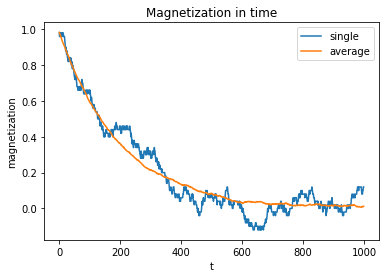

In [232]:
import matplotlib.pyplot as plt
t =np.arange(1000)
plt.plot(t,one_ws1,label = 'single')
plt.plot(t, steps_ws1, label = 'average')
plt.title('Magnetization in time')
plt.xlabel('t')
plt.ylabel('magnetization')
plt.legend()

# q = 3

In [0]:
def monte_carlo(G,p,q):
    for nd in range(100):
      G.nodes[nd]["opinion"] = 1
    mag = 0
    for i in range(1000):
      g = qvoter_model(G,p,q)
      G = g
    for Dt in range(len(list(g.nodes))):
      mag = mag + g.nodes[Dt]['opinion']
    return mag/len(list(g.nodes))

def steps(G,p,q):
    MC = 0
    for j in range(100):
      k = monte_carlo(G,p,q)
      MC = MC+k
    return np.sum(MC)/100

In [0]:
q = 3
mag_ba = []
mag_ws1 = []
mag_ws2 = []
mag_complete = []

for p in np.linspace(0,.5,25):
  mag_ba.append(steps(g_ba,p,q))
  mag_ws1.append(steps(g_ws1,p,q))
  mag_ws2.append(steps(g_ws2,p,q))
  mag_complete.append(steps(g_complete,p,q))

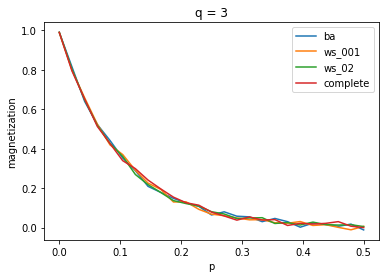

In [241]:
p =np.linspace(0,.5,25)
plt.plot(p,mag_ba,label = 'ba')
plt.plot(p,mag_ws1, label = 'ws_001')
plt.plot(p,mag_ws2, label = 'ws_02')
plt.plot(p,mag_complete, label = 'complete')
plt.title('q = 3')
plt.xlabel('p')
plt.ylabel('magnetization')
plt.legend()

# q = 4

In [0]:
q = 4
mag_ba = []
mag_ws1 = []
mag_ws2 = []
mag_complete = []

for p in np.linspace(0,.5,25):
  mag_ba.append(steps(g_ba,p,q))
  mag_ws1.append(steps(g_ws1,p,q))
  mag_ws2.append(steps(g_ws2,p,q))
  mag_complete.append(steps(g_complete,p,q))

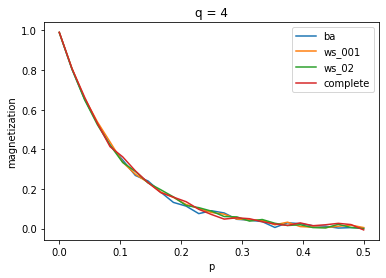

In [243]:
p =np.linspace(0,.5,25)
plt.plot(p,mag_ba,label = 'ba')
plt.plot(p,mag_ws1, label = 'ws_001')
plt.plot(p,mag_ws2, label = 'ws_02')
plt.plot(p,mag_complete, label = 'complete')
plt.title('q = 4')
plt.xlabel('p')
plt.ylabel('magnetization')
plt.legend()

In [0]:
mag_ws1 = []
mag_ws2 = []
mag_ws3 = []
mag_ws4 = []
mag_ws5 = []

for p in np.linspace(0,.5,25):
  mag_ws1.append(steps(g_ws1,p,1))
  mag_ws2.append(steps(g_ws1,p,2))
  mag_ws3.append(steps(g_ws1,p,3))
  mag_ws4.append(steps(g_ws1,p,4))
  mag_ws5.append(steps(g_ws1,p,5))

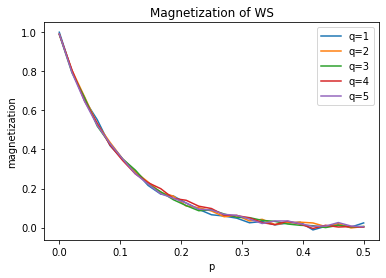

In [245]:
p =np.linspace(0,.5,25)
plt.plot(p,mag_ws1,label = 'q=1')
plt.plot(p,mag_ws2, label = 'q=2')
plt.plot(p,mag_ws3, label = 'q=3')
plt.plot(p,mag_ws4, label = 'q=4')
plt.plot(p,mag_ws5, label = 'q=5')
plt.title('Magnetization of WS')
plt.xlabel('p')
plt.ylabel('magnetization')
plt.legend()